In [1]:
import pandas as pd
import numpy as np
import scipy

In [2]:
# Test Claude API connection
from dotenv import load_dotenv
import os
import anthropic

load_dotenv()
client = anthropic.Anthropic(api_key=os.environ.get("CLAUDE_API_KEY"))
response = client.messages.create(model="claude-sonnet-4-20250514", max_tokens=50, messages=[{"role": "user", "content": "Say hi"}])
print("✓ API key works!", response.content[0].text)

✓ API key works! Hi! How are you doing today?


In [4]:
from apply_qualitative_classifiers import classify_feedback

# Run the classification on all 80 feedback responses
df_coded = classify_feedback()

# Display the results
df_coded.head()

Loading data...
Loaded 80 rows

Starting Classification
Rows to process: 0 to 80 (80 rows)
Classifiers: 20
Total API calls: 1600
Model: claude-sonnet-4-20250514


Row 1/80 (firebase_id: 0GOGgShO3UTPI9zJwv1oX7OgBg33)
  [1/20] overall_sentiment... ✓ [4] Negative
  [2/20] interface_usability... ✓ [3] Usable with minor issues
  [3/20] ai_prompt_following... ✓ [5] Not mentioned
  [4/20] prompt_behavior_understanding... ✓ [4] No understanding evident
  [5/20] response_formatting_issues... ✓ [3] Both length and formatting
  [6/20] time_constraint_mentioned... ✓ [5] Not mentioned
  [7/20] customization_experience... ✓ [4] Not mentioned
  [8/20] emotional_impact... ✓ [3] Neutral
  [9/20] learning_outcome... ✓ [6] No learning mentioned
  [10/20] specific_issues... ✓ [6] Wrong tone/personality
  [11/20] positive_features... ✓ [10] None praised
  [12/20] suggested_improvements... ✓ [2] Better formatting
  [13/20] use_case_interest... ✓ [8] None mentioned
  [14/20] conversation_quality... ✓ [4] Poo

,firebase_id,condition_name,post_open_ended_feedback,overall_sentiment,interface_usability,ai_prompt_following,prompt_behavior_understanding,response_formatting_issues,time_constraint_mentioned,customization_experience,...,positive_features_label,suggested_improvements_label,use_case_interest_label,conversation_quality_label,design_control_perception_label,comparison_to_other_ai_label,participant_engagement_label,key_themes_label,trust_safety_indicators_label,recommendation_likelihood_label
0,0GOGgShO3UTPI9zJwv1oX7OgBg33,experimental,the ai needs to be able to format responses be...,4,3,5,4,3,5,4,...,None praised,Better formatting,None mentioned,Poor,Not mentioned,No comparison,Minimally engaged,Technical Issues,No themes,Unlikely
1,1qfktC9Y92PKWTO6pDVsp8Pxgmu2,control,"The interface was well done, The bot refused t...",3,3,4,4,4,5,2,...,Interface design,Better prompt adherence,Entertainment,Mixed,Low control,No comparison,Engaged,Interface/Usability,Boundary testing,Neutral
2,2PON97vGteXaKUGJLJRM3Ei8qiq2,experimental,It was fun to creat the prompt. I liked being ...,2,2,5,2,1,5,1,...,Quick iteration,No improvements,Entertainment,Not evaluated,High control,No comparison,Engaged,Customization/Design,No themes,Likely
3,2jbIuV09Beckv7WemXsd4DLFnd13,control,I like the idea of designing the ai bot. I fee...,2,5,5,2,4,1,3,...,None praised,More time,None mentioned,Not evaluated,Moderate control,No comparison,Engaged,Customization/Design,No themes,Likely
4,3cwsojHvQtWFdxqKkr4Cz7Orzgq2,control,I saw immediate improvement each time I update...,2,5,2,1,4,5,2,...,Quick iteration,No improvements,None mentioned,Good,High control,No comparison,Engaged,"AI Performance, Customization/Design",No themes,Highly likely


In [ ]:
df = pd.read_csv('data_clean/open_ended_coded_with_labels.csv')



,firebase_id,condition_name,post_open_ended_feedback,overall_sentiment,interface_usability,ai_prompt_following,prompt_behavior_understanding,response_formatting_issues,time_constraint_mentioned,customization_experience,...,positive_features_label,suggested_improvements_label,use_case_interest_label,conversation_quality_label,design_control_perception_label,comparison_to_other_ai_label,participant_engagement_label,key_themes_label,trust_safety_indicators_label,recommendation_likelihood_label
0,0GOGgShO3UTPI9zJwv1oX7OgBg33,experimental,the ai needs to be able to format responses be...,4,3,5,4,3,5,4,...,None praised,Better formatting,None mentioned,Poor,Not mentioned,No comparison,Minimally engaged,Technical Issues,No themes,Unlikely
1,1qfktC9Y92PKWTO6pDVsp8Pxgmu2,control,"The interface was well done, The bot refused t...",3,3,4,4,4,5,2,...,Interface design,Better prompt adherence,Entertainment,Mixed,Low control,No comparison,Engaged,Interface/Usability,Boundary testing,Neutral
2,2PON97vGteXaKUGJLJRM3Ei8qiq2,experimental,It was fun to creat the prompt. I liked being ...,2,2,5,2,1,5,1,...,Quick iteration,No improvements,Entertainment,Not evaluated,High control,No comparison,Engaged,Customization/Design,No themes,Likely
3,2jbIuV09Beckv7WemXsd4DLFnd13,control,I like the idea of designing the ai bot. I fee...,2,5,5,2,4,1,3,...,None praised,More time,None mentioned,Not evaluated,Moderate control,No comparison,Engaged,Customization/Design,No themes,Likely
4,3cwsojHvQtWFdxqKkr4Cz7Orzgq2,control,I saw immediate improvement each time I update...,2,5,2,1,4,5,2,...,Quick iteration,No improvements,None mentioned,Good,High control,No comparison,Engaged,"AI Performance, Customization/Design",No themes,Highly likely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,uz3VXXq40jhRTDs79wCgR2og0yG3,control,I think the AI did a good job listening and ca...,2,5,2,4,4,5,4,...,Natural conversation,No improvements,None mentioned,Excellent,Moderate control,No comparison,Engaged,AI Performance,Trust established,Highly likely
76,v1dvJdgvhSbYoavR1my9cRSvHQp2,experimental,"It was a very educative chat, i really like it",1,5,5,5,4,5,4,...,Helpful advice,No improvements,None mentioned,Good,Not mentioned,No comparison,Engaged,"Learning/Insight, Conversation Content",No themes,Highly likely
77,vCxvD82bFnYGIDhTyZ2aYETqCjM2,experimental,This was a great exercise! I like the idea of ...,2,5,5,2,4,5,1,...,Personality match,No improvements,Therapeutic use,Excellent,High control,No comparison,Highly engaged,Customization/Design,Safety concerns,Likely
78,vPjuEjarwGMGJnWBnAxbyZpbtug2,experimental,This was an interesting experiment. The interf...,2,1,5,4,4,5,4,...,Interface design,No improvements,None mentioned,Good,Not mentioned,No comparison,Minimally engaged,"Interface/Usability, AI Performance",Trust established,Likely


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the data
df = pd.read_csv('data_clean/open_ended_coded_with_labels.csv')

# Basic info
print(f"Total responses: {len(df)}")
print(f"\nCondition breakdown:")
print(df['condition_name'].value_counts())

# Show all label columns
label_cols = [col for col in df.columns if col.endswith('_label')]
print(f"\n{len(label_cols)} label columns found:")
for col in label_cols:
    print(f"  - {col}")

Total responses: 80

Condition breakdown:
condition_name
experimental    42
control         38
Name: count, dtype: int64

20 label columns found:
  - overall_sentiment_label
  - interface_usability_label
  - ai_prompt_following_label
  - prompt_behavior_understanding_label
  - response_formatting_issues_label
  - time_constraint_mentioned_label
  - customization_experience_label
  - emotional_impact_label
  - learning_outcome_label
  - specific_issues_label
  - positive_features_label
  - suggested_improvements_label
  - use_case_interest_label
  - conversation_quality_label
  - design_control_perception_label
  - comparison_to_other_ai_label
  - participant_engagement_label
  - key_themes_label
  - trust_safety_indicators_label
  - recommendation_likelihood_label


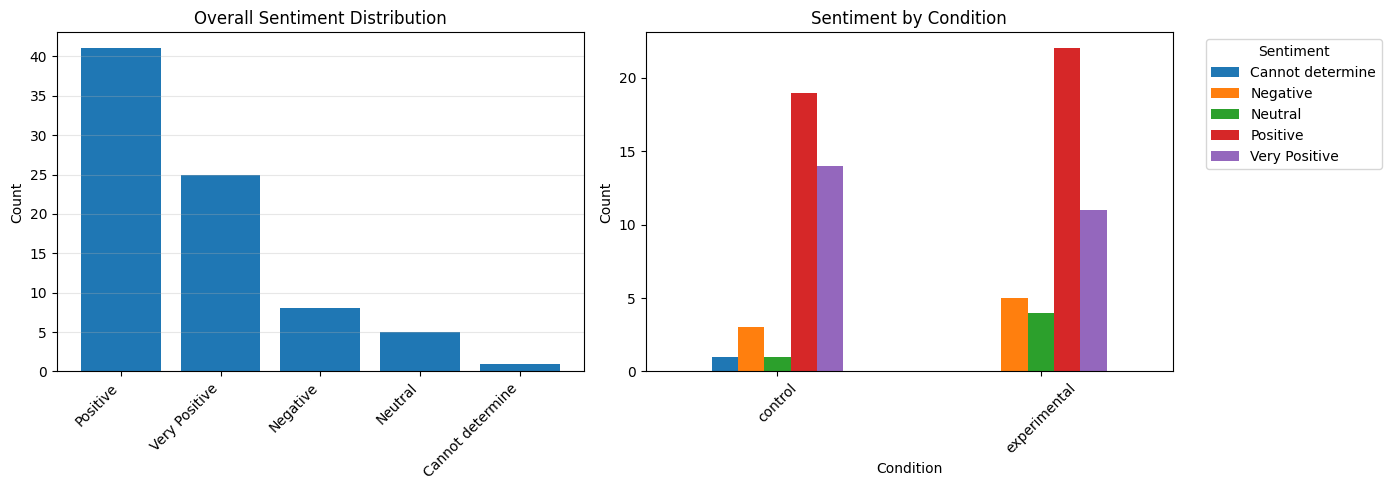


Sentiment by Condition:
overall_sentiment_label  Cannot determine  Negative  Neutral  Positive  \
condition_name                                                           
control                                 1         3        1        19   
experimental                            0         5        4        22   

overall_sentiment_label  Very Positive  
condition_name                          
control                             14  
experimental                        11  

Chi-square test:
χ² = 3.689, p = 0.4498


In [7]:
# Overall sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall distribution
sentiment_counts = df['overall_sentiment_label'].value_counts()
axes[0].bar(range(len(sentiment_counts)), sentiment_counts.values)
axes[0].set_xticks(range(len(sentiment_counts)))
axes[0].set_xticklabels(sentiment_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Count')
axes[0].set_title('Overall Sentiment Distribution')
axes[0].grid(axis='y', alpha=0.3)

# By condition
sentiment_by_condition = pd.crosstab(df['condition_name'], df['overall_sentiment_label'])
sentiment_by_condition.plot(kind='bar', ax=axes[1])
axes[1].set_ylabel('Count')
axes[1].set_title('Sentiment by Condition')
axes[1].set_xlabel('Condition')
axes[1].legend(title='Sentiment', bbox_to_anchor=(1.05, 1))
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Statistical test
print("\nSentiment by Condition:")
print(sentiment_by_condition)
print("\nChi-square test:")
chi2, p_value, dof, expected = stats.chi2_contingency(sentiment_by_condition)
print(f"χ² = {chi2:.3f}, p = {p_value:.4f}")

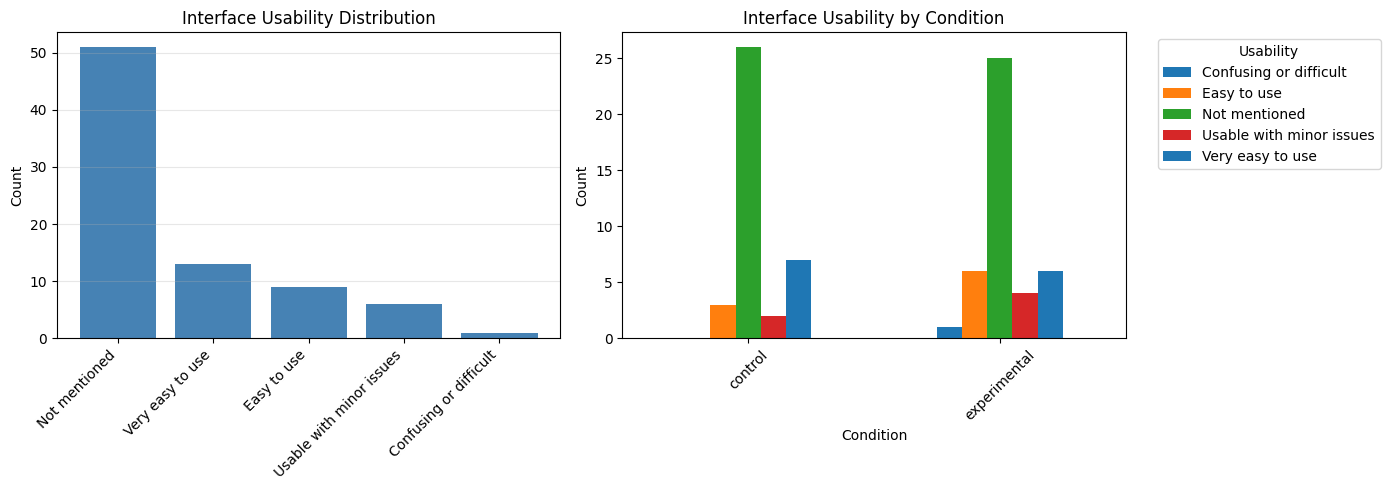


Interface Usability by Condition:
interface_usability_label  Confusing or difficult  Easy to use  Not mentioned  \
condition_name                                                                  
control                                         0            3             26   
experimental                                    1            6             25   

interface_usability_label  Usable with minor issues  Very easy to use  
condition_name                                                         
control                                           2                 7  
experimental                                      4                 6  


In [8]:
# Interface usability
usability_counts = df['interface_usability_label'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall
axes[0].bar(range(len(usability_counts)), usability_counts.values, color='steelblue')
axes[0].set_xticks(range(len(usability_counts)))
axes[0].set_xticklabels(usability_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Count')
axes[0].set_title('Interface Usability Distribution')
axes[0].grid(axis='y', alpha=0.3)

# By condition
usability_by_condition = pd.crosstab(df['condition_name'], df['interface_usability_label'])
usability_by_condition.plot(kind='bar', ax=axes[1], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
axes[1].set_ylabel('Count')
axes[1].set_title('Interface Usability by Condition')
axes[1].set_xlabel('Condition')
axes[1].legend(title='Usability', bbox_to_anchor=(1.05, 1))
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nInterface Usability by Condition:")
print(usability_by_condition)

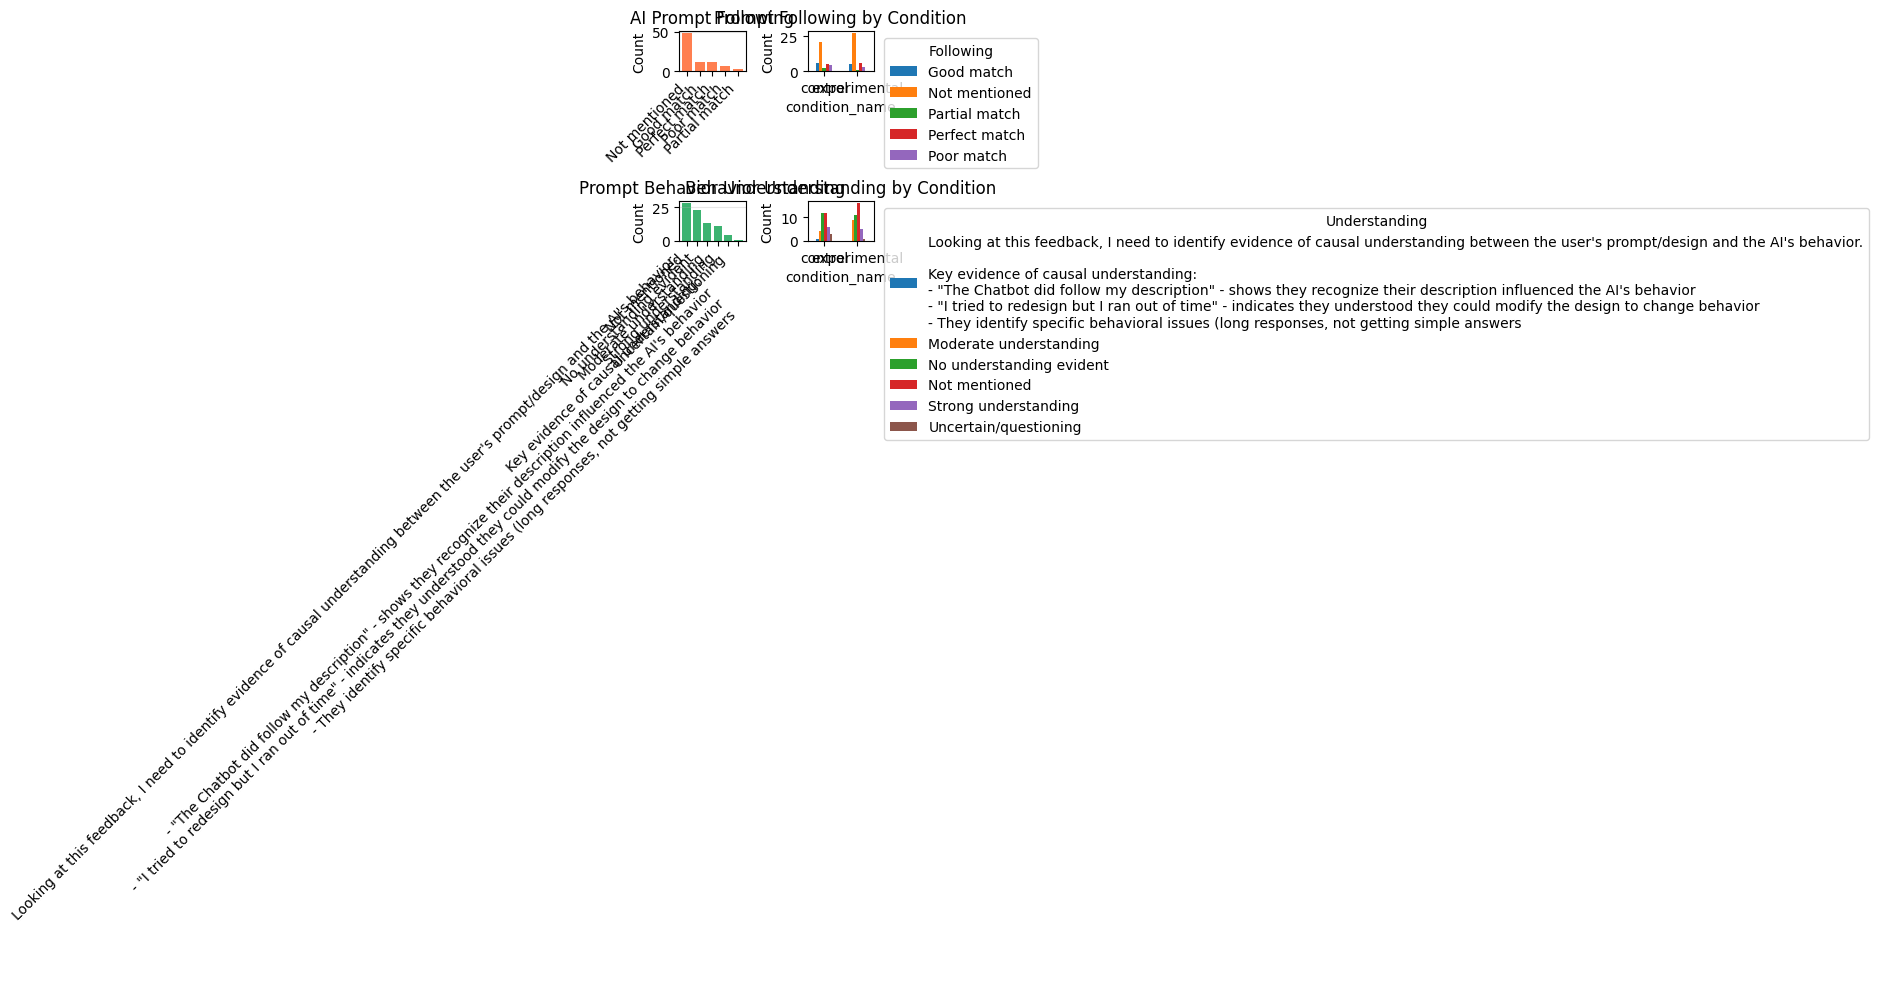


Prompt Following by Condition:
ai_prompt_following_label  Good match  Not mentioned  Partial match  \
condition_name                                                        
control                             6             21              2   
experimental                        5             27              1   

ai_prompt_following_label  Perfect match  Poor match  
condition_name                                        
control                                5           4  
experimental                           6           3  


Behavior Understanding by Condition:
prompt_behavior_understanding_label  Looking at this feedback, I need to identify evidence of causal understanding between the user's prompt/design and the AI's behavior.\n\nKey evidence of causal understanding:\n- "The Chatbot did follow my description" - shows they recognize their description influenced the AI's behavior\n- "I tried to redesign but I ran out of time" - indicates they understood they could modify the de

In [9]:
# AI prompt following and understanding
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Prompt following
prompt_following = df['ai_prompt_following_label'].value_counts()
axes[0, 0].bar(range(len(prompt_following)), prompt_following.values, color='coral')
axes[0, 0].set_xticks(range(len(prompt_following)))
axes[0, 0].set_xticklabels(prompt_following.index, rotation=45, ha='right')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('AI Prompt Following')
axes[0, 0].grid(axis='y', alpha=0.3)

# Prompt following by condition
prompt_by_condition = pd.crosstab(df['condition_name'], df['ai_prompt_following_label'])
prompt_by_condition.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Prompt Following by Condition')
axes[0, 1].legend(title='Following', bbox_to_anchor=(1.05, 1))
axes[0, 1].tick_params(axis='x', rotation=0)

# Prompt understanding
understanding = df['prompt_behavior_understanding_label'].value_counts()
axes[1, 0].bar(range(len(understanding)), understanding.values, color='mediumseagreen')
axes[1, 0].set_xticks(range(len(understanding)))
axes[1, 0].set_xticklabels(understanding.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Prompt Behavior Understanding')
axes[1, 0].grid(axis='y', alpha=0.3)

# Understanding by condition
understanding_by_condition = pd.crosstab(df['condition_name'], df['prompt_behavior_understanding_label'])
understanding_by_condition.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Behavior Understanding by Condition')
axes[1, 1].legend(title='Understanding', bbox_to_anchor=(1.05, 1))
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\nPrompt Following by Condition:")
print(prompt_by_condition)
print("\n\nBehavior Understanding by Condition:")
print(understanding_by_condition)

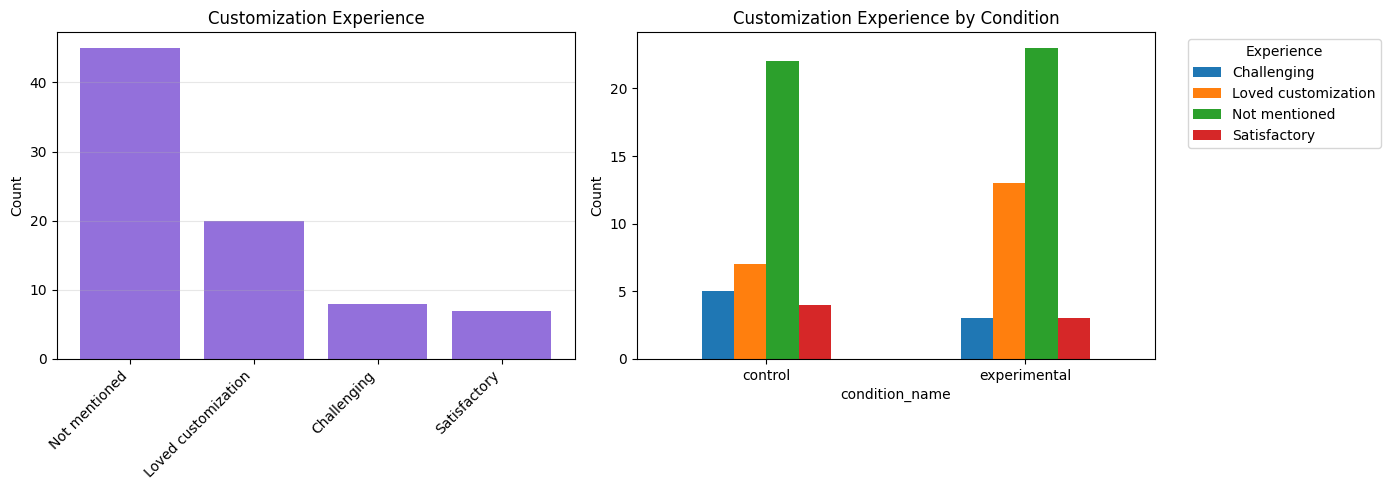


Customization Experience by Condition:
customization_experience_label  Challenging  Loved customization  \
condition_name                                                     
control                                   5                    7   
experimental                              3                   13   

customization_experience_label  Not mentioned  Satisfactory  
condition_name                                               
control                                    22             4  
experimental                               23             3  

Chi-square test: χ² = 2.271, p = 0.5181


In [10]:
# Customization experience
customization = df['customization_experience_label'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall
axes[0].bar(range(len(customization)), customization.values, color='mediumpurple')
axes[0].set_xticks(range(len(customization)))
axes[0].set_xticklabels(customization.index, rotation=45, ha='right')
axes[0].set_ylabel('Count')
axes[0].set_title('Customization Experience')
axes[0].grid(axis='y', alpha=0.3)

# By condition
customization_by_condition = pd.crosstab(df['condition_name'], df['customization_experience_label'])
customization_by_condition.plot(kind='bar', ax=axes[1])
axes[1].set_ylabel('Count')
axes[1].set_title('Customization Experience by Condition')
axes[1].legend(title='Experience', bbox_to_anchor=(1.05, 1))
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\nCustomization Experience by Condition:")
print(customization_by_condition)

# Statistical test
if customization_by_condition.shape[0] > 1 and customization_by_condition.shape[1] > 1:
    chi2, p_value, dof, expected = stats.chi2_contingency(customization_by_condition)
    print(f"\nChi-square test: χ² = {chi2:.3f}, p = {p_value:.4f}")

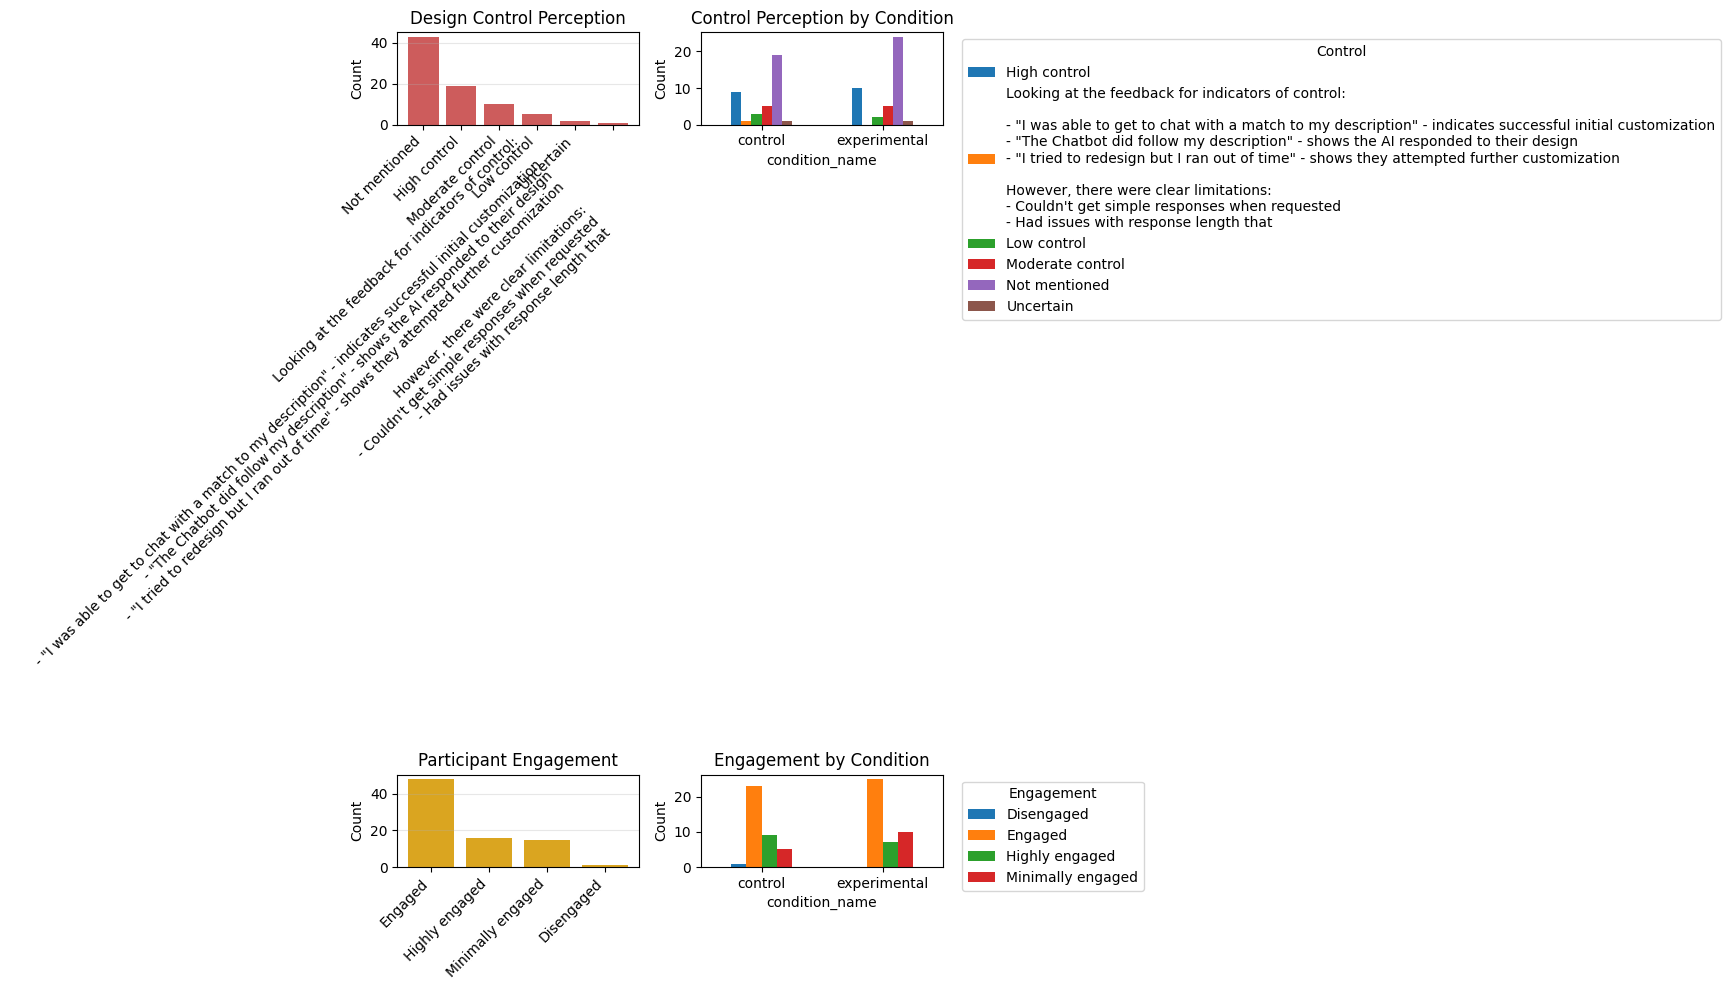

Control Perception by Condition:
design_control_perception_label  High control  \
condition_name                                  
control                                     9   
experimental                               10   

design_control_perception_label  Looking at the feedback for indicators of control:\n\n- "I was able to get to chat with a match to my description" - indicates successful initial customization\n- "The Chatbot did follow my description" - shows the AI responded to their design\n- "I tried to redesign but I ran out of time" - shows they attempted further customization\n\nHowever, there were clear limitations:\n- Couldn't get simple responses when requested\n- Had issues with response length that  \
condition_name                                                                                                                                                                                                                                                              

In [11]:
# Design control and engagement
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Control perception
control = df['design_control_perception_label'].value_counts()
axes[0, 0].bar(range(len(control)), control.values, color='indianred')
axes[0, 0].set_xticks(range(len(control)))
axes[0, 0].set_xticklabels(control.index, rotation=45, ha='right')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Design Control Perception')
axes[0, 0].grid(axis='y', alpha=0.3)

# Control by condition
control_by_condition = pd.crosstab(df['condition_name'], df['design_control_perception_label'])
control_by_condition.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Control Perception by Condition')
axes[0, 1].legend(title='Control', bbox_to_anchor=(1.05, 1))
axes[0, 1].tick_params(axis='x', rotation=0)

# Engagement
engagement = df['participant_engagement_label'].value_counts()
axes[1, 0].bar(range(len(engagement)), engagement.values, color='goldenrod')
axes[1, 0].set_xticks(range(len(engagement)))
axes[1, 0].set_xticklabels(engagement.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Participant Engagement')
axes[1, 0].grid(axis='y', alpha=0.3)

# Engagement by condition
engagement_by_condition = pd.crosstab(df['condition_name'], df['participant_engagement_label'])
engagement_by_condition.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Engagement by Condition')
axes[1, 1].legend(title='Engagement', bbox_to_anchor=(1.05, 1))
axes[1, 1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("Control Perception by Condition:")
print(control_by_condition)
print("\n\nEngagement by Condition:")
print(engagement_by_condition)

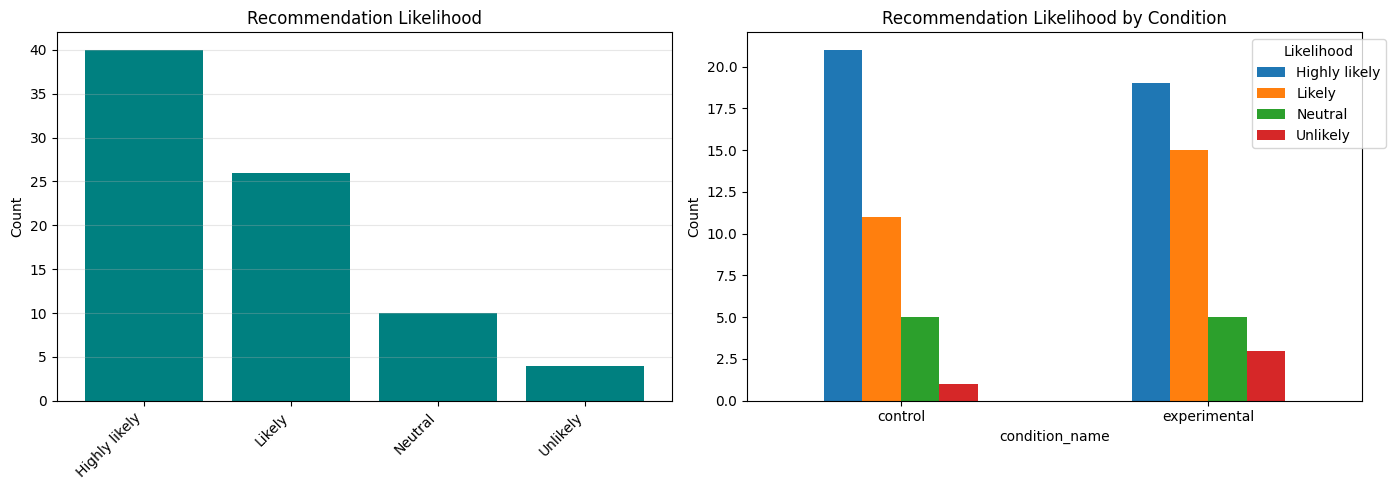


Recommendation Likelihood by Condition:
recommendation_likelihood_label  Highly likely  Likely  Neutral  Unlikely
condition_name                                                           
control                                     21      11        5         1
experimental                                19      15        5         3

Chi-square test: χ² = 1.519, p = 0.6779


In [12]:
# Recommendation likelihood
recommendation = df['recommendation_likelihood_label'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Overall
axes[0].bar(range(len(recommendation)), recommendation.values, color='teal')
axes[0].set_xticks(range(len(recommendation)))
axes[0].set_xticklabels(recommendation.index, rotation=45, ha='right')
axes[0].set_ylabel('Count')
axes[0].set_title('Recommendation Likelihood')
axes[0].grid(axis='y', alpha=0.3)

# By condition
rec_by_condition = pd.crosstab(df['condition_name'], df['recommendation_likelihood_label'])
rec_by_condition.plot(kind='bar', ax=axes[1])
axes[1].set_ylabel('Count')
axes[1].set_title('Recommendation Likelihood by Condition')
axes[1].legend(title='Likelihood', bbox_to_anchor=(1.05, 1))
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

print("\nRecommendation Likelihood by Condition:")
print(rec_by_condition)

# Statistical test
if rec_by_condition.shape[0] > 1 and rec_by_condition.shape[1] > 1:
    chi2, p_value, dof, expected = stats.chi2_contingency(rec_by_condition)
    print(f"\nChi-square test: χ² = {chi2:.3f}, p = {p_value:.4f}")

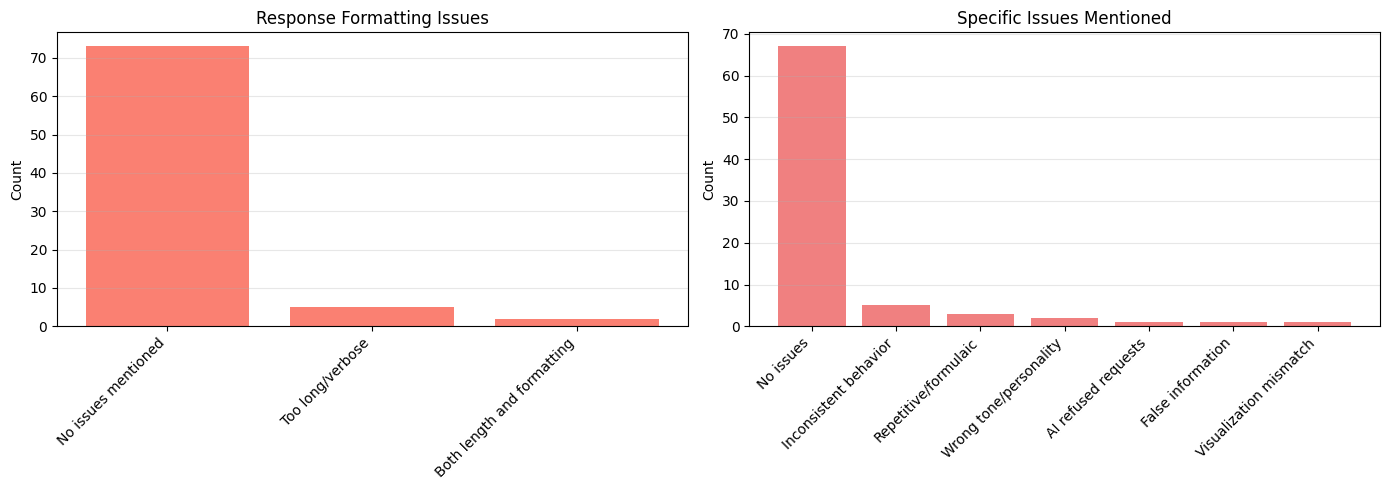

Response Formatting Issues:
response_formatting_issues_label
No issues mentioned           73
Too long/verbose               5
Both length and formatting     2
Name: count, dtype: int64


Specific Issues:
specific_issues_label
No issues                 67
Inconsistent behavior      5
Repetitive/formulaic       3
Wrong tone/personality     2
AI refused requests        1
False information          1
Visualization mismatch     1
Name: count, dtype: int64


In [13]:
# Response formatting and specific issues
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Response formatting issues
formatting = df['response_formatting_issues_label'].value_counts()
axes[0].bar(range(len(formatting)), formatting.values, color='salmon')
axes[0].set_xticks(range(len(formatting)))
axes[0].set_xticklabels(formatting.index, rotation=45, ha='right')
axes[0].set_ylabel('Count')
axes[0].set_title('Response Formatting Issues')
axes[0].grid(axis='y', alpha=0.3)

# Specific issues
issues = df['specific_issues_label'].value_counts()
axes[1].bar(range(len(issues)), issues.values, color='lightcoral')
axes[1].set_xticks(range(len(issues)))
axes[1].set_xticklabels(issues.index, rotation=45, ha='right')
axes[1].set_ylabel('Count')
axes[1].set_title('Specific Issues Mentioned')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Response Formatting Issues:")
print(df['response_formatting_issues_label'].value_counts())
print("\n\nSpecific Issues:")
print(df['specific_issues_label'].value_counts())

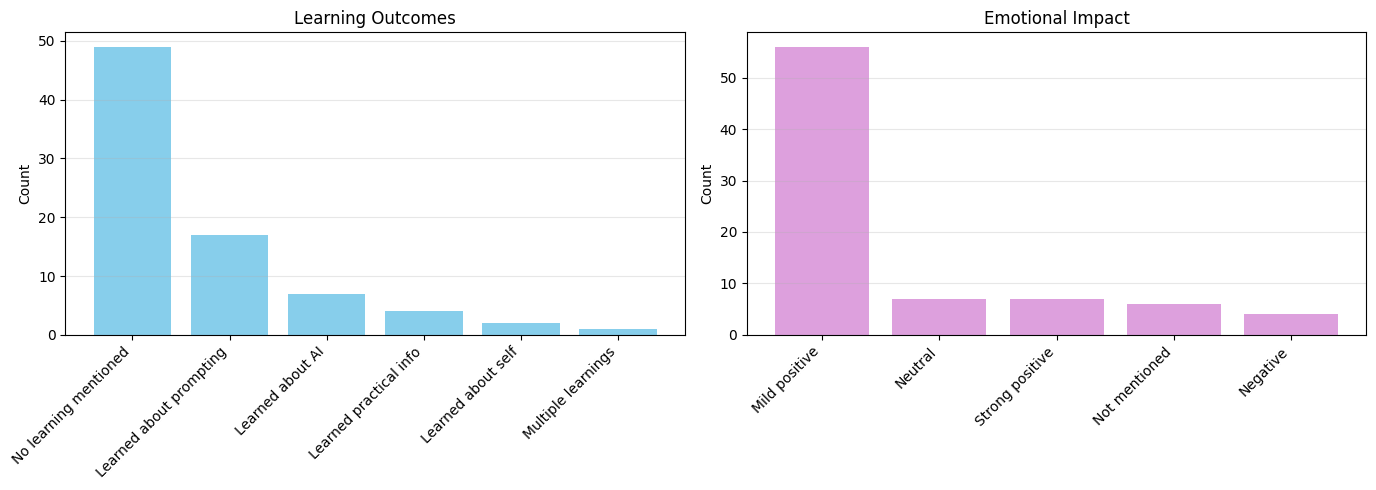

Learning Outcomes:
learning_outcome_label
No learning mentioned      49
Learned about prompting    17
Learned about AI            7
Learned practical info      4
Learned about self          2
Multiple learnings          1
Name: count, dtype: int64


Emotional Impact:
emotional_impact_label
Mild positive      56
Neutral             7
Strong positive     7
Not mentioned       6
Negative            4
Name: count, dtype: int64


In [14]:
# Learning outcomes and emotional impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Learning outcomes
learning = df['learning_outcome_label'].value_counts()
axes[0].bar(range(len(learning)), learning.values, color='skyblue')
axes[0].set_xticks(range(len(learning)))
axes[0].set_xticklabels(learning.index, rotation=45, ha='right')
axes[0].set_ylabel('Count')
axes[0].set_title('Learning Outcomes')
axes[0].grid(axis='y', alpha=0.3)

# Emotional impact
emotional = df['emotional_impact_label'].value_counts()
axes[1].bar(range(len(emotional)), emotional.values, color='plum')
axes[1].set_xticks(range(len(emotional)))
axes[1].set_xticklabels(emotional.index, rotation=45, ha='right')
axes[1].set_ylabel('Count')
axes[1].set_title('Emotional Impact')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Learning Outcomes:")
print(df['learning_outcome_label'].value_counts())
print("\n\nEmotional Impact:")
print(df['emotional_impact_label'].value_counts())

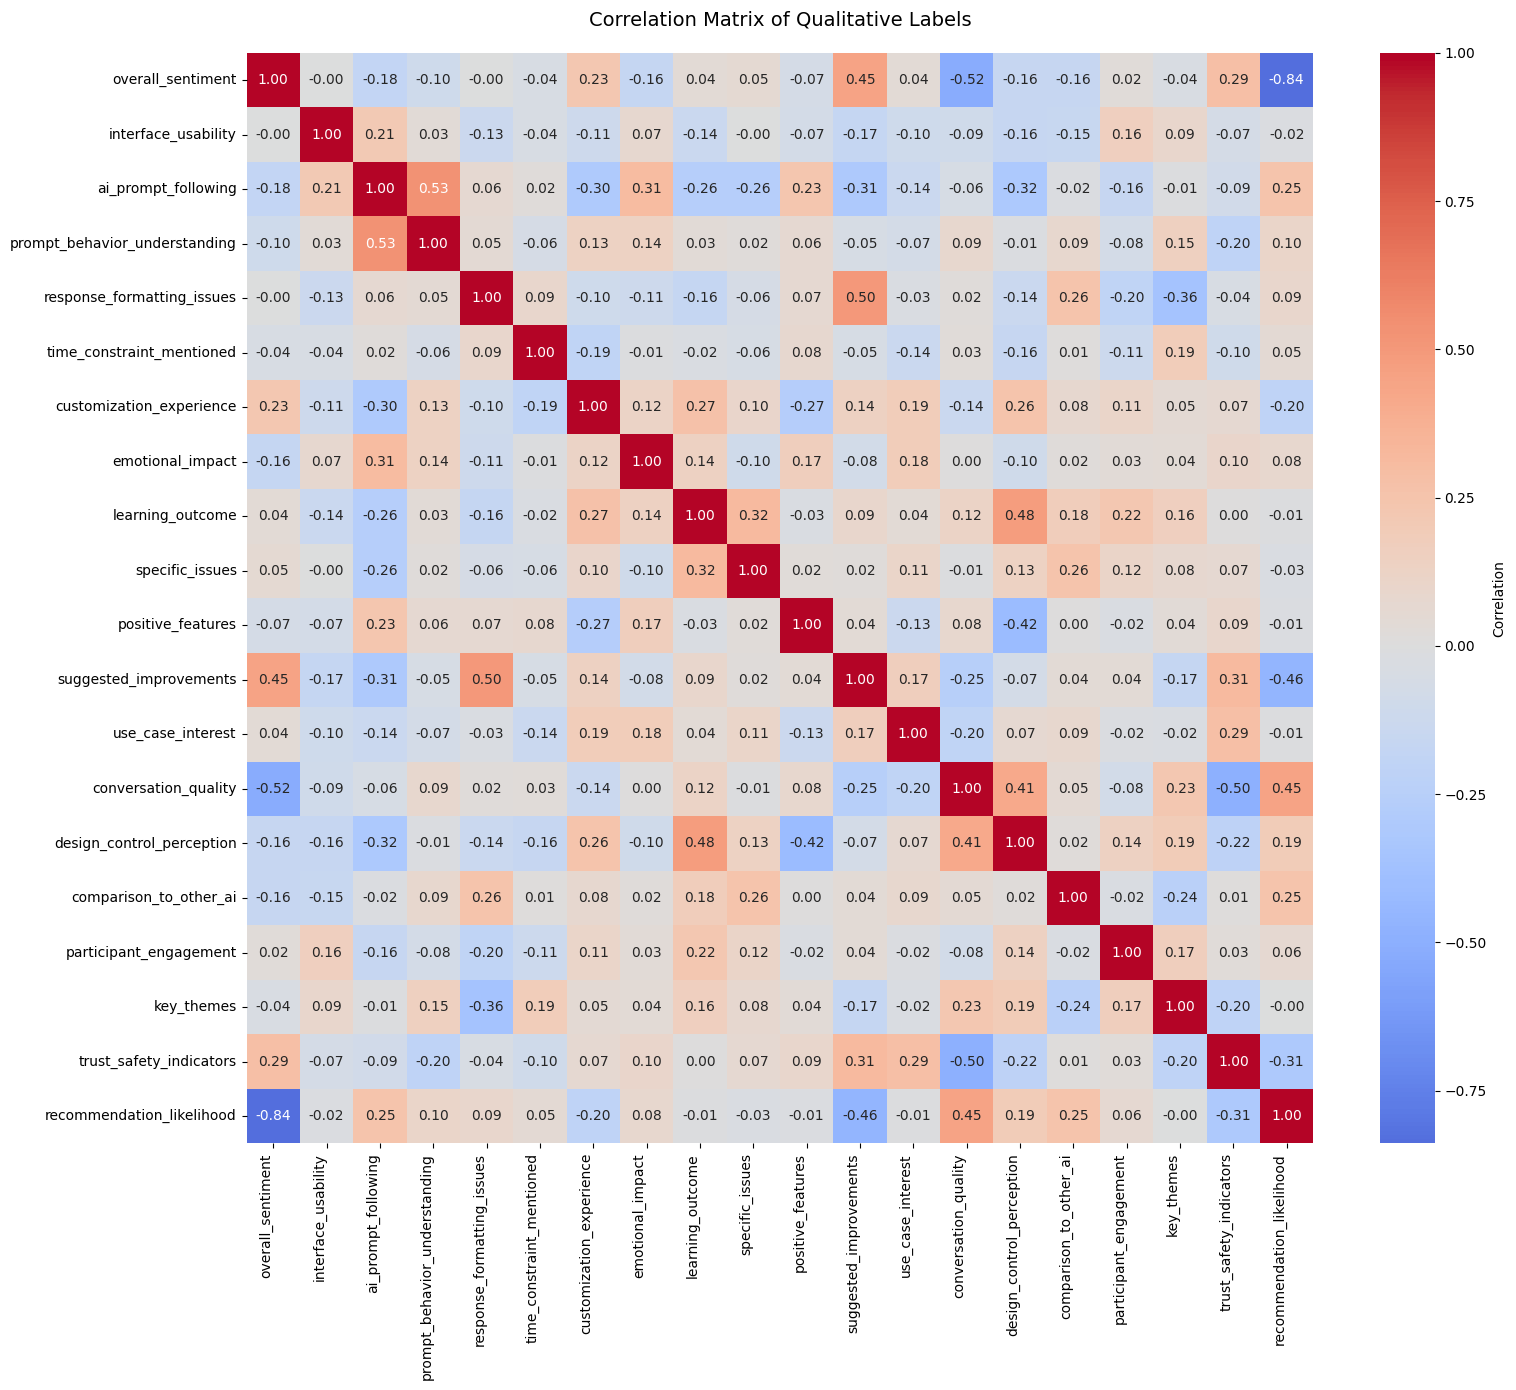

In [15]:
# Create numeric encoding for labels to show correlations
label_cols = [col for col in df.columns if col.endswith('_label')]

# Create a mapping for ordinal categories
def encode_labels(df, label_cols):
    encoded_df = df.copy()
    
    for col in label_cols:
        # Create numeric mapping based on sentiment/quality
        unique_vals = df[col].dropna().unique()
        if len(unique_vals) > 0:
            encoded_df[col + '_num'] = pd.Categorical(df[col]).codes
    
    return encoded_df

encoded_df = encode_labels(df, label_cols)
numeric_label_cols = [col + '_num' for col in label_cols if col + '_num' in encoded_df.columns]

# Calculate correlation matrix
correlation_matrix = encoded_df[numeric_label_cols].corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            xticklabels=[col.replace('_label_num', '') for col in numeric_label_cols],
            yticklabels=[col.replace('_label_num', '') for col in numeric_label_cols],
            cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Qualitative Labels', pad=20, fontsize=14)
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

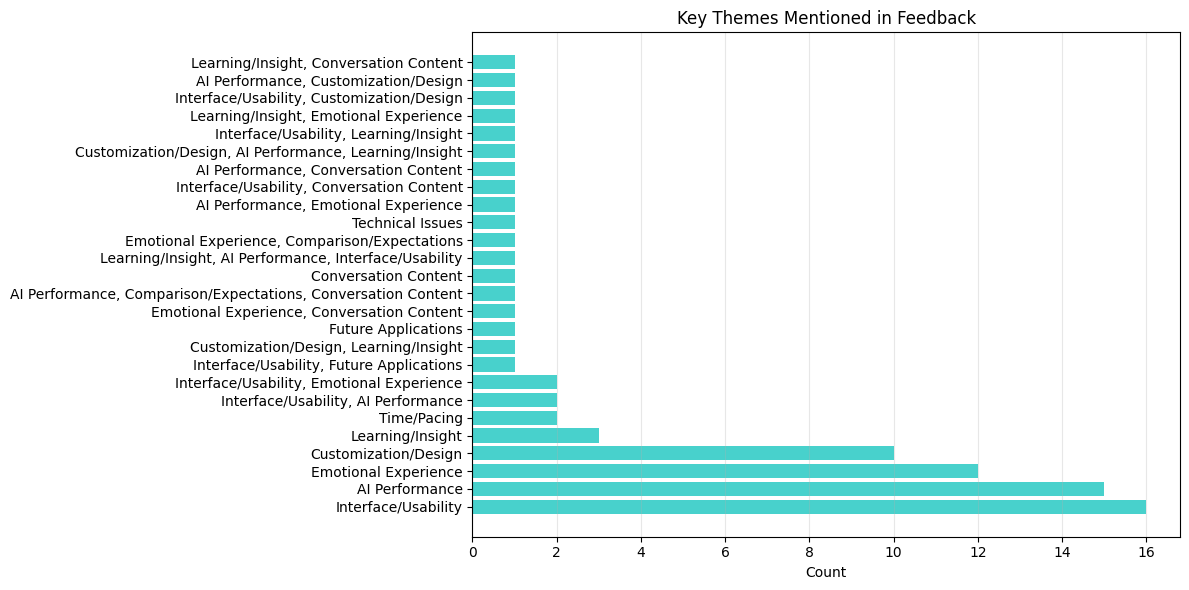

Key Themes Distribution:
key_themes_label
Interface/Usability                                              16
AI Performance                                                   15
Emotional Experience                                             12
Customization/Design                                             10
Learning/Insight                                                  3
Time/Pacing                                                       2
Interface/Usability, AI Performance                               2
Interface/Usability, Emotional Experience                         2
Interface/Usability, Future Applications                          1
Customization/Design, Learning/Insight                            1
Future Applications                                               1
Emotional Experience, Conversation Content                        1
AI Performance, Comparison/Expectations, Conversation Content     1
Conversation Content                                              1
Learni

In [16]:
# Key themes mentioned
themes = df['key_themes_label'].value_counts()

plt.figure(figsize=(12, 6))
plt.barh(range(len(themes)), themes.values, color='mediumturquoise')
plt.yticks(range(len(themes)), themes.index)
plt.xlabel('Count')
plt.title('Key Themes Mentioned in Feedback')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Key Themes Distribution:")
print(themes)

# Themes by condition
print("\n\nKey Themes by Condition:")
themes_by_condition = pd.crosstab(df['condition_name'], df['key_themes_label'])
print(themes_by_condition)

In [17]:
# Comprehensive summary by condition
print("=" * 80)
print("COMPREHENSIVE LABEL ANALYSIS BY CONDITION")
print("=" * 80)

for label_col in label_cols:
    print(f"\n{label_col.replace('_label', '').replace('_', ' ').title()}:")
    print("-" * 60)
    
    crosstab = pd.crosstab(df['condition_name'], df[label_col], margins=True)
    print(crosstab)
    
    # Chi-square test if applicable
    if crosstab.shape[0] > 2 and crosstab.shape[1] > 2:  # Exclude margins row/col
        crosstab_no_margins = pd.crosstab(df['condition_name'], df[label_col])
        if crosstab_no_margins.shape[0] > 1 and crosstab_no_margins.shape[1] > 1:
            try:
                chi2, p_value, dof, expected = stats.chi2_contingency(crosstab_no_margins)
                print(f"\nχ² = {chi2:.3f}, p = {p_value:.4f}", end="")
                if p_value < 0.05:
                    print(" ***SIGNIFICANT***")
                else:
                    print()
            except:
                pass

COMPREHENSIVE LABEL ANALYSIS BY CONDITION

Overall Sentiment:
------------------------------------------------------------
overall_sentiment_label  Cannot determine  Negative  Neutral  Positive  \
condition_name                                                           
control                                 1         3        1        19   
experimental                            0         5        4        22   
All                                     1         8        5        41   

overall_sentiment_label  Very Positive  All  
condition_name                               
control                             14   38  
experimental                        11   42  
All                                 25   80  

χ² = 3.689, p = 0.4498

Interface Usability:
------------------------------------------------------------
interface_usability_label  Confusing or difficult  Easy to use  Not mentioned  \
condition_name                                                                  
control